Part 2 - Introducing Optimization and derivatives  
https://www.youtube.com/watch?v=txh3TQDwP1g&list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3&index=9

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data, spiral_data

In [2]:
nnfs.init()

In [3]:
X, y = vertical_data(samples=100, classes=3)

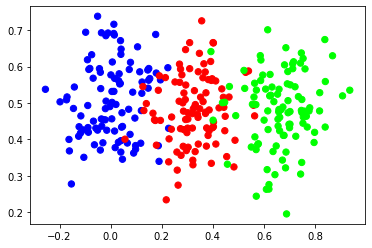

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [5]:
class Layer_Dense:
    
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


class Activation_ReLU:
    
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

        
class Activation_Softmax:
    
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
        
        
class Loss:
    
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

    
# catagorical cross entropy
class Loss_CatCrossEntropy(Loss):
    
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clip = np.clip(y_pred, 1e-7, 1-1e-7)
        
        # for one hot encoded vectors
        if len(y_true.shape) == 1:
            correct_conf = y_pred_clip[range(samples), y_true]
            
        elif len(y_true.shape) == 2:
            correct_conf = np.sum(y_pred_clip*y_true, axis=1)
            
        negative_log_likelihood = -np.log(correct_conf)
        return negative_log_likelihood

In [6]:
dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

#print(activation2.output[:5])

In [7]:
loss_function = Loss_CatCrossEntropy()

In [8]:
lowest_loss = 9999999

best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()

best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

In [9]:
for iteration in range(1000000):
    
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    
    dense1.forward(X)
    activation1.forward(dense1.output)
    
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    loss = loss_function.calculate(activation2.output, y)
    
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)
    
    if loss < lowest_loss:
        
        print('New set of weights found, iteration', iteration,
              'loss:', loss, 'accuracy', accuracy)
        
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        
        lowest_loss = loss
        
    else:
        
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration 0 loss: 1.0984223 accuracy 0.3333333333333333
New set of weights found, iteration 4 loss: 1.0983797 accuracy 0.3333333333333333
New set of weights found, iteration 5 loss: 1.0973539 accuracy 0.33666666666666667
New set of weights found, iteration 6 loss: 1.0963587 accuracy 0.26666666666666666
New set of weights found, iteration 8 loss: 1.0953789 accuracy 0.34
New set of weights found, iteration 14 loss: 1.095357 accuracy 0.3333333333333333
New set of weights found, iteration 21 loss: 1.0940696 accuracy 0.3333333333333333
New set of weights found, iteration 24 loss: 1.0937892 accuracy 0.3333333333333333
New set of weights found, iteration 25 loss: 1.0903312 accuracy 0.62
New set of weights found, iteration 27 loss: 1.0894265 accuracy 0.3333333333333333
New set of weights found, iteration 28 loss: 1.0862789 accuracy 0.3333333333333333
New set of weights found, iteration 29 loss: 1.0799779 accuracy 0.5933333333333334
New set of weights found, iteration 

New set of weights found, iteration 351 loss: 0.42785254 accuracy 0.9133333333333333
New set of weights found, iteration 355 loss: 0.42722255 accuracy 0.9133333333333333
New set of weights found, iteration 359 loss: 0.4268541 accuracy 0.91
New set of weights found, iteration 360 loss: 0.41957077 accuracy 0.9166666666666666
New set of weights found, iteration 366 loss: 0.41585687 accuracy 0.9166666666666666
New set of weights found, iteration 380 loss: 0.4111647 accuracy 0.9133333333333333
New set of weights found, iteration 383 loss: 0.4090681 accuracy 0.9033333333333333
New set of weights found, iteration 385 loss: 0.40334335 accuracy 0.9166666666666666
New set of weights found, iteration 386 loss: 0.39778107 accuracy 0.9133333333333333
New set of weights found, iteration 388 loss: 0.39515197 accuracy 0.9266666666666666
New set of weights found, iteration 394 loss: 0.3826742 accuracy 0.9133333333333333
New set of weights found, iteration 396 loss: 0.3809077 accuracy 0.91
New set of we

New set of weights found, iteration 1024 loss: 0.19739637 accuracy 0.93
New set of weights found, iteration 1031 loss: 0.19728425 accuracy 0.9333333333333333
New set of weights found, iteration 1032 loss: 0.19691966 accuracy 0.9333333333333333
New set of weights found, iteration 1035 loss: 0.19583611 accuracy 0.9233333333333333
New set of weights found, iteration 1036 loss: 0.19569984 accuracy 0.9266666666666666
New set of weights found, iteration 1047 loss: 0.19433993 accuracy 0.9266666666666666
New set of weights found, iteration 1063 loss: 0.19433871 accuracy 0.93
New set of weights found, iteration 1070 loss: 0.19310279 accuracy 0.9266666666666666
New set of weights found, iteration 1077 loss: 0.19304602 accuracy 0.9266666666666666
New set of weights found, iteration 1078 loss: 0.19148956 accuracy 0.9266666666666666
New set of weights found, iteration 1086 loss: 0.1911535 accuracy 0.9266666666666666
New set of weights found, iteration 1090 loss: 0.1905721 accuracy 0.93
New set of w

New set of weights found, iteration 7606 loss: 0.17296612 accuracy 0.9266666666666666
New set of weights found, iteration 7882 loss: 0.1728793 accuracy 0.93
New set of weights found, iteration 10488 loss: 0.17285775 accuracy 0.9266666666666666
New set of weights found, iteration 11046 loss: 0.17285126 accuracy 0.93
New set of weights found, iteration 11091 loss: 0.17284304 accuracy 0.93
New set of weights found, iteration 11111 loss: 0.1728275 accuracy 0.93
New set of weights found, iteration 11205 loss: 0.17282379 accuracy 0.93
New set of weights found, iteration 11223 loss: 0.172743 accuracy 0.93
New set of weights found, iteration 11235 loss: 0.17262085 accuracy 0.9233333333333333
New set of weights found, iteration 11276 loss: 0.17261098 accuracy 0.9266666666666666
New set of weights found, iteration 11366 loss: 0.17256287 accuracy 0.93
New set of weights found, iteration 11382 loss: 0.17238241 accuracy 0.9266666666666666
New set of weights found, iteration 11425 loss: 0.17231217 a

New set of weights found, iteration 37956 loss: 0.16550794 accuracy 0.93
New set of weights found, iteration 38317 loss: 0.1654901 accuracy 0.9266666666666666
New set of weights found, iteration 38372 loss: 0.16530803 accuracy 0.9266666666666666
New set of weights found, iteration 41167 loss: 0.16523296 accuracy 0.9266666666666666
New set of weights found, iteration 42133 loss: 0.1651447 accuracy 0.9266666666666666
New set of weights found, iteration 43247 loss: 0.16509824 accuracy 0.9266666666666666
New set of weights found, iteration 43639 loss: 0.16503775 accuracy 0.9266666666666666
New set of weights found, iteration 43785 loss: 0.16501811 accuracy 0.9266666666666666
New set of weights found, iteration 44268 loss: 0.16500945 accuracy 0.9233333333333333
New set of weights found, iteration 44941 loss: 0.1648671 accuracy 0.9266666666666666
New set of weights found, iteration 45127 loss: 0.16483799 accuracy 0.9266666666666666
New set of weights found, iteration 45220 loss: 0.16475153 a

New set of weights found, iteration 654469 loss: 0.16020346 accuracy 0.9266666666666666
New set of weights found, iteration 704468 loss: 0.16019127 accuracy 0.9333333333333333
New set of weights found, iteration 710077 loss: 0.16015892 accuracy 0.93
New set of weights found, iteration 750557 loss: 0.16015676 accuracy 0.9266666666666666
New set of weights found, iteration 758113 loss: 0.16015553 accuracy 0.9333333333333333
New set of weights found, iteration 760659 loss: 0.1601357 accuracy 0.9266666666666666
New set of weights found, iteration 765495 loss: 0.16013524 accuracy 0.9333333333333333
New set of weights found, iteration 779637 loss: 0.16009079 accuracy 0.9266666666666666
New set of weights found, iteration 788781 loss: 0.16004142 accuracy 0.9266666666666666
New set of weights found, iteration 859934 loss: 0.16002059 accuracy 0.9266666666666666
New set of weights found, iteration 867338 loss: 0.16000547 accuracy 0.93
New set of weights found, iteration 890606 loss: 0.15995547 a

Spiral Data

In [10]:
X, y = spiral_data(samples=100, classes=3)

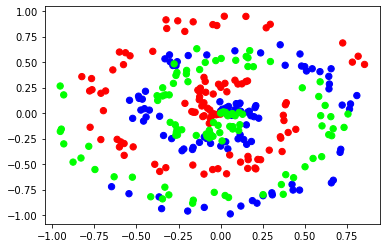

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [12]:
dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

loss_function = Loss_CatCrossEntropy()

lowest_loss = 9999999

best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()

best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

In [13]:
for iteration in range(1000000):
    
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    
    dense1.forward(X)
    activation1.forward(dense1.output)
    
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    loss = loss_function.calculate(activation2.output, y)
    
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)
    
    if loss < lowest_loss:
        
        print('New set of weights found, iteration', iteration,
              'loss:', loss, 'accuracy', accuracy)
        
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        
        lowest_loss = loss
        
    else:
        
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration 0 loss: 1.0989002 accuracy 0.3333333333333333
New set of weights found, iteration 4 loss: 1.0971452 accuracy 0.3466666666666667
New set of weights found, iteration 6 loss: 1.0960552 accuracy 0.35
New set of weights found, iteration 18 loss: 1.0952367 accuracy 0.3566666666666667
New set of weights found, iteration 20 loss: 1.0952102 accuracy 0.35
New set of weights found, iteration 25 loss: 1.0946301 accuracy 0.4
New set of weights found, iteration 26 loss: 1.0944747 accuracy 0.3333333333333333
New set of weights found, iteration 33 loss: 1.0935929 accuracy 0.38666666666666666
New set of weights found, iteration 34 loss: 1.0931503 accuracy 0.38666666666666666
New set of weights found, iteration 38 loss: 1.0931393 accuracy 0.39
New set of weights found, iteration 41 loss: 1.0929139 accuracy 0.37
New set of weights found, iteration 46 loss: 1.09258 accuracy 0.38666666666666666
New set of weights found, iteration 49 loss: 1.0922265 accuracy 0.39333333333

New set of weights found, iteration 25690 loss: 1.0480366 accuracy 0.4666666666666667
New set of weights found, iteration 26510 loss: 1.047948 accuracy 0.43333333333333335
New set of weights found, iteration 26864 loss: 1.0474694 accuracy 0.45
New set of weights found, iteration 27201 loss: 1.0471716 accuracy 0.46
New set of weights found, iteration 34716 loss: 1.046668 accuracy 0.47333333333333333
New set of weights found, iteration 35699 loss: 1.046653 accuracy 0.47
New set of weights found, iteration 36927 loss: 1.0465525 accuracy 0.44
New set of weights found, iteration 37144 loss: 1.0463945 accuracy 0.44
New set of weights found, iteration 38408 loss: 1.0461035 accuracy 0.45
New set of weights found, iteration 39875 loss: 1.046062 accuracy 0.45
New set of weights found, iteration 40274 loss: 1.0460433 accuracy 0.47333333333333333
New set of weights found, iteration 49170 loss: 1.0458822 accuracy 0.4666666666666667
New set of weights found, iteration 50111 loss: 1.045835 accuracy 0